In [91]:
!python -m spacy download es_core_news_sm

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     -- ------------------------------------- 0.8/12.9 MB 4.2 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.9 MB 5.1 MB/s eta 0:00:03
     ----------- ---------------------------- 3.7/12.9 MB 6.1 MB/s eta 0:00:02
     ---------------- ----------------------- 5.2/12.9 MB 6.4 MB/s eta 0:00:02
     --------------------- ------------------ 6.8/12.9 MB 6.6 MB/s eta 0:00:01
     ------------------------- -------------- 8.1/12.9 MB 6.6 MB/s eta 0:00:01
     --------------------------- ------------ 8.9/12.9 MB 6.7 MB/s eta 0:00:01
     -------------------------------- ------- 10.5/12.9 MB 6.3 MB/s eta 0:00:01
     ---------------------------------- ----- 11.3/12.9 MB 6.0 MB/s eta 0:00:01
     ---------------------------------------  12.6/12.9 MB 6.1 MB/s eta 0:00:01
     ---------------------------------------- 12.9/12.9 MB 6.0 

In [92]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import spacy
from wordcloud import WordCloud

In [93]:
path = r"C:\Users\karen\OneDrive - Universidad EAFIT\Proyecto Humanidades Digitales y Esfera Pública\Columnas de Opinion El Espectador.xlsx"
hojas = pd.read_excel(path, sheet_name=None)

columnas = hojas["2019"]


In [94]:
columnas.head()

,Diario,Autor,Fecha,Título,Texto,Vínculo
0,El Espectador,Juan Manuel Morales Calderón,30 de diciembre de 2018,El golf profesional colombiano necesita unidad...,Una de las noticias más importantes con las qu...,https://web.archive.org/web/20190101200805/htt...
1,El Espectador,Soraya Constante,31 de diciembre de 2018,Lenin Moreno y su cruzada estéril contra la co...,"Quito — El presidente de Ecuador, Lenin Moreno...",https://web.archive.org/web/20190101195954/htt...
2,El Espectador,Marcos Peckel,01 de enero de 2019,Tierra del hombre nuevo,"Tirana, Albania. Así designó el dictador comu...",https://web.archive.org/web/20190102082936/htt...
3,El Espectador,Pascual Gaviria,02 de enero de 2019,Decretar el enemigo,Nos hemos acostumbrado a los combates a muerte...,https://web.archive.org/web/20190102100427/htt...
4,El Espectador,Juan Pablo Ruiz Soto,02 de enero de 2019,Año Nuevo caliente,Este año será un año caliente para Colombia. N...,https://web.archive.org/web/20190102100630/htt...


In [38]:
# Función para convertir el texto a fecha
def convertir_fecha(texto_fecha):
    # Mapeo de meses en español a inglés (necesario para datetime)
    meses_espanol = {
        "enero": "January", "febrero": "February", "marzo": "March",
        "abril": "April", "mayo": "May", "junio": "June",
        "julio": "July", "agosto": "August", "septiembre": "September",
        "octubre": "October", "noviembre": "November", "diciembre": "December"
    }
    
    # Extraer día, mes y año
    partes = texto_fecha.split(" de ")
    dia = partes[0]
    mes_espanol = partes[1]
    año = partes[2]
    
    # Traducir mes al inglés
    mes_ingles = meses_espanol[mes_espanol.lower()]
    
    # Crear string en formato reconocible (ej: "30 December 2018")
    fecha_formateada = f"{dia} {mes_ingles} {año}"
    
    # Convertir a datetime
    return datetime.strptime(fecha_formateada, "%d %B %Y")

In [95]:
columnas["Fecha"] = columnas["Fecha"].apply(convertir_fecha)

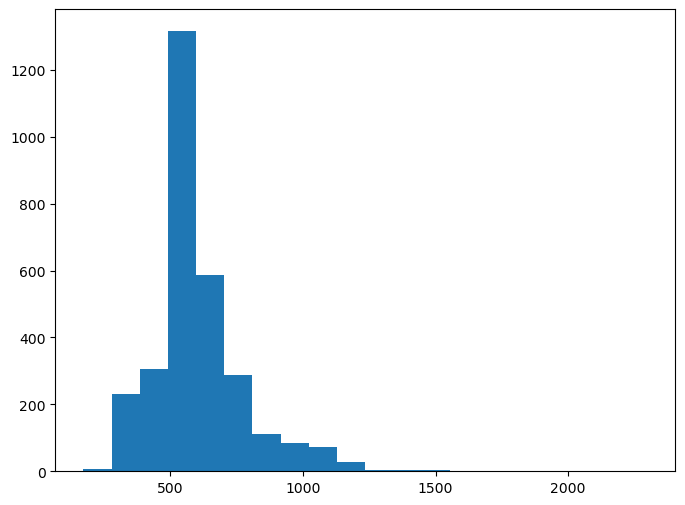

In [96]:
# Para calcular el número de palabras por columna
columnas['Longitud'] = columnas['Texto'].str.split().str.len()

# Histograma de longitud de textos
plt.figure(figsize=(8, 6))
plt.hist(columnas['Longitud'], bins=20)
plt.show()

In [ ]:
columnas["Mes"] = columnas["Fecha"].dt.month

# longitud media por mes
longitud_por_mes = columnas.groupby(['Mes'])['Longitud'].mean().reset_index()

In [75]:
longitud_por_mes

,Mes,Longitud
0,1,609.359375
1,2,612.426724
2,3,610.763948
3,4,618.268817
4,5,598.331839
5,6,608.752941
6,7,612.438806
7,8,614.333333
8,9,601.030303
9,10,593.840000


# *Nubes de Palabras*

In [118]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from spacy.lang.es.stop_words import STOP_WORDS

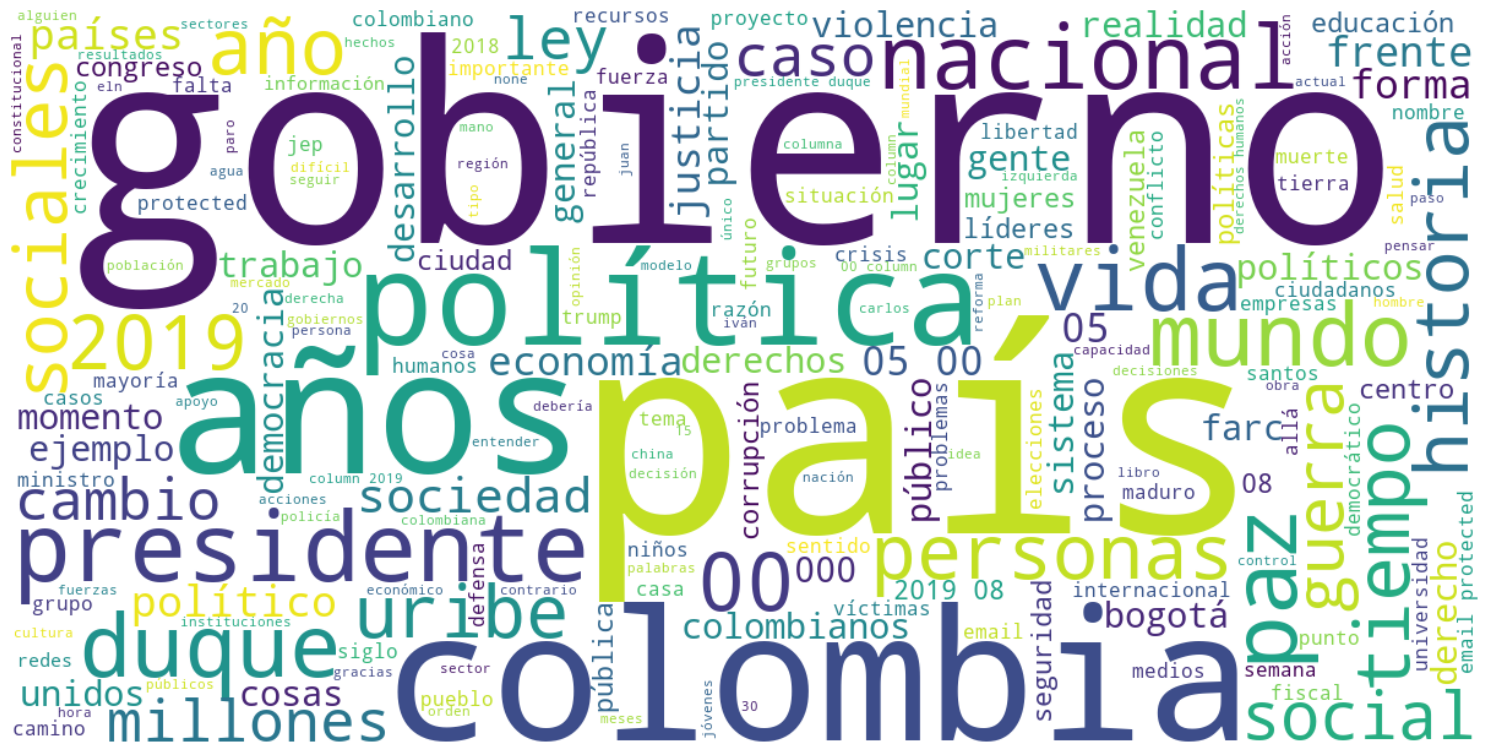

In [ ]:
# Combinar todos los textos en un solo string
texto_completo = " ".join(columnas['Texto'])
#texto_completo = " ".join(texto_completo.split())

# 1. Configurar stopwords personalizadas
stopwords_es = STOP_WORDS #.union({"ejemplo", "palabra_no_deseada"})  # Añade palabras manualmente

# 2. Vectorización y conteo de palabras
vectorizer = CountVectorizer(
    stop_words=list(stopwords_es),  # Convertir a lista
    lowercase=True,                 # Convertir a minúsculas
    ngram_range=(1, 2)             # Incluir unigramas y bigramas (opcional)
)

X = vectorizer.fit_transform([texto_completo])
palabras_frecuentes = dict(zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0]))

# 3. Filtrar palabras poco relevantes (opcional)
palabras_frecuentes = {k: v for k, v in palabras_frecuentes.items() if v >= 3}  # Solo palabras con freq >= 3

# 4. Generar nube de palabras
wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color="white",
    colormap="viridis",            # Paleta de colores
    max_words=200,                 # Límite de palabras
    contour_width=1,               # Borde de la nube
    contour_color="steelblue"      # Color del borde
).generate_from_frequencies(palabras_frecuentes)

# 5. Visualización
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout()
plt.show()

In [124]:
palabras_frecuentes["gobierno"]

3359